In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import fetch_california_housing


# <div class = "alert alert-block alert-info"> Defining class for the linear regression algorithm </div>

In [3]:
class linear_regression:
    def __init__(self, train_X, train_y, test_x, test_y):
        self.train_X = train_X
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y
        self.m = len(train_X)   # number of training data
        self.n = train_X.shape[1]
        self.learning_rate = 0.01
        self.iterations = 6000
    
    def gradient_descent(self, train_x, train_y):
        theta = np.zeros(self.n + 1)
        cost_history = []
        for epoch in range(self.iterations):
            predictions = np.dot(train_x, theta)
            errors = predictions - train_y
            theta -= self.learning_rate * (1/self.m) * np.dot(train_x.T, errors)

            cost = (1/(2*self.m)) * np.sum(errors**2)
            cost_history.append(cost)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Cost: {cost}')

        return theta, cost_history
    
    def train(self):
        X_train_with_intercept = np.c_[np.ones(self.train_X.shape[0]), self.train_X]
        theta, cost_history = self.gradient_descent(X_train_with_intercept, self.train_y)

        return theta, cost_history
    def visulaize_costhistory(self, cost_history):
        plt.plot(range(self.iterations), cost_history)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Cost History')
        plt.show()
    
    def predict(self, test_x, theta):
        X_test_with_intercept = np.c_[np.ones(test_x.shape[0]), test_x]
        return np.dot(X_test_with_intercept, theta)
    

    def evaluate_model(self, test_y, predictions):
        rmse = np.sqrt(np.mean((test_y - predictions)**2))

        R2 = 1 - (np.sum((test_y - predictions)**2) / np.sum((test_y - np.mean(test_y))**2))

        print(f'Root Mean Squared Error: {rmse}')
        print(f'R-squared: {R2}')

    def Visulaize_prediction(self, test_y, predictions):
        plt.scatter(test_y, predictions)
        plt.xlabel('Actual Labels')
        plt.ylabel('Predicted Labels')
        plt.title('Actual vs Predicted')
        plt.show()
        

  




## <div class = "alert alert-block alert-info"> Preparing the california housing data set from sklearn </div>

In [4]:
california = fetch_california_housing()
X = california.data
y = california.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

## <div class = "alert alert-block alert-info"> visiualizing the error of our algorithm on the california dataset </div>

Epoch 0, Cost: 2.8168117176017047
Epoch 100, Cost: 0.649006180509256
Epoch 200, Cost: 0.35459411653616363
Epoch 300, Cost: 0.3089729488142286
Epoch 400, Cost: 0.2977180400699909
Epoch 500, Cost: 0.29192107290231306
Epoch 600, Cost: 0.2875187229782162
Epoch 700, Cost: 0.2838439210804876
Epoch 800, Cost: 0.2807191500352466
Epoch 900, Cost: 0.27805102711823604
Epoch 1000, Cost: 0.2757695892554548
Epoch 1100, Cost: 0.2738171820878432
Epoch 1200, Cost: 0.27214521368245437
Epoch 1300, Cost: 0.27071247240342605
Epoch 1400, Cost: 0.2694839256460713
Epoch 1500, Cost: 0.26842976062567
Epoch 1600, Cost: 0.2675245898859117
Epoch 1700, Cost: 0.2667467841332366
Epoch 1800, Cost: 0.26607790861798114
Epoch 1900, Cost: 0.26550224559302166
Epoch 2000, Cost: 0.2650063890766412
Epoch 2100, Cost: 0.26457890067162554
Epoch 2200, Cost: 0.2642100170868374
Epoch 2300, Cost: 0.2638914015076629
Epoch 2400, Cost: 0.26361593218697116
Epoch 2500, Cost: 0.2633775226464105
Epoch 2600, Cost: 0.26317096873214185
Epoch 

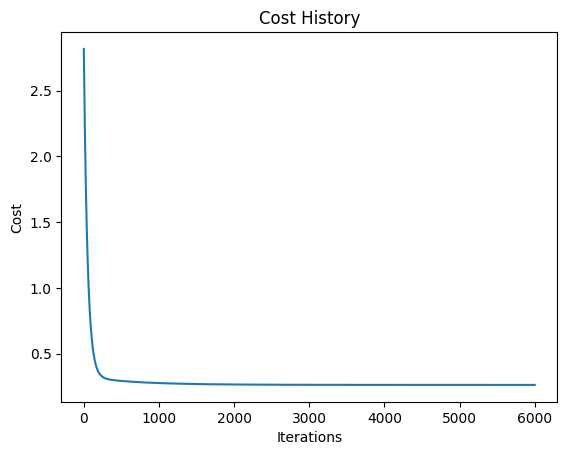

In [5]:
linear_reg = linear_regression(train_X=X_train, train_y=y_train, test_x=X_test, test_y=y_test)

# Train the model
theta, cost_history = linear_reg.train()
print(theta)
linear_reg.visulaize_costhistory(cost_history)

## <div class = "alert alert-block alert-success"> Evaluating the performance of linear regression on the clalifornia housing dataset </dv>

### As we see below its Root mean squared Error is about 0.72 and  its coefficient of determination(R<sup> 2 </sup>) is about 0.59

In [6]:
predictions = linear_reg.predict(X_test, theta)
print(predictions)

linear_reg.evaluate_model(y_test, predictions)

[2.27462702 2.79086614 1.90903606 ... 0.85586288 2.79373106 2.22524322]
Root Mean Squared Error: 0.7272646600823237
R-squared: 0.5943771637610077


# <div class = "alert alert-block alert-info"> Testing linear regression algorithm on another dataset Diabetes dataset from sklearn </div> 

In [7]:
diabetes = load_diabetes()

# Create a DataFrame
diabetes_df = pd.DataFrame(data=diabetes.data, columns=[f'feature_{i}' for i in range(diabetes.data.shape[1])])
diabetes_df['target'] = diabetes.target
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
print(diabetes_df)

     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     0.038076   0.050680   0.061696   0.021872  -0.044223  -0.034821   
1    -0.001882  -0.044642  -0.051474  -0.026328  -0.008449  -0.019163   
2     0.085299   0.050680   0.044451  -0.005670  -0.045599  -0.034194   
3    -0.089063  -0.044642  -0.011595  -0.036656   0.012191   0.024991   
4     0.005383  -0.044642  -0.036385   0.021872   0.003935   0.015596   
5    -0.092695  -0.044642  -0.040696  -0.019442  -0.068991  -0.079288   
6    -0.045472   0.050680  -0.047163  -0.015999  -0.040096  -0.024800   
7     0.063504   0.050680  -0.001895   0.066629   0.090620   0.108914   
8     0.041708   0.050680   0.061696  -0.040099  -0.013953   0.006202   
9    -0.070900  -0.044642   0.039062  -0.033213  -0.012577  -0.034508   
10   -0.096328  -0.044642  -0.083808   0.008101  -0.103389  -0.090561   
11    0.027178   0.050680   0.017506  -0.033213  -0.007073   0.045972   
12    0.016281  -0.044642  -0.028840  -0.009113  -0

## <div class = "alert alert-block alert-info"> dividing the dataset to train set and testing set </div>

In [8]:
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Display the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(X_train)

X_train shape: (353, 10), y_train shape: (353,)
X_test shape: (89, 10), y_test shape: (89,)
[[ 0.26591186  1.06548848  0.0508049  ... -0.83030083  0.07797853
   1.5448333 ]
 [-2.25428981 -0.93853666 -1.62601299 ... -1.60610247 -0.89500095
  -0.1097401 ]
 [ 0.57139085  1.06548848 -0.74228465 ... -0.05449919 -0.31450955
  -1.06765102]
 ...
 [ 1.25871858 -0.93853666 -0.44770853 ...  1.49710409  1.66345406
   2.85107547]
 [-1.64333183 -0.93853666 -1.53537419 ... -0.83030083 -0.38081857
  -1.76431351]
 [ 0.87686984  1.06548848  1.50102577 ...  0.72130245  1.54329291
   1.80608174]]


## <div class = "alert alert-block alert-info"> visiualizing the error of our algorithm on the diabetes dataset </div>

Epoch 0, Cost: 14557.573654390935
Epoch 100, Cost: 3039.6604945718823
Epoch 200, Cost: 1608.0427047029875
Epoch 300, Cost: 1408.8501318253766
Epoch 400, Cost: 1380.3595757635
Epoch 500, Cost: 1376.0084541084414
Epoch 600, Cost: 1375.1682788513963
Epoch 700, Cost: 1374.8684187327226
Epoch 800, Cost: 1374.6650140622276
Epoch 900, Cost: 1374.4869043106391
Epoch 1000, Cost: 1374.3208430742707
Epoch 1100, Cost: 1374.1634582513927
Epoch 1200, Cost: 1374.0133586677177
Epoch 1300, Cost: 1373.869674203018
Epoch 1400, Cost: 1373.7317356670328
Epoch 1500, Cost: 1373.598986903573
Epoch 1600, Cost: 1373.4709526680374
Epoch 1700, Cost: 1373.3472224639102
Epoch 1800, Cost: 1373.227439961937
Epoch 1900, Cost: 1373.1112949268288
Epoch 2000, Cost: 1372.9985166085096
Epoch 2100, Cost: 1372.8888681741237
Epoch 2200, Cost: 1372.7821419632426
Epoch 2300, Cost: 1372.6781554263453
Epoch 2400, Cost: 1372.5767476418564
Epoch 2500, Cost: 1372.4777763270322
Epoch 2600, Cost: 1372.381115271745
Epoch 2700, Cost: 13

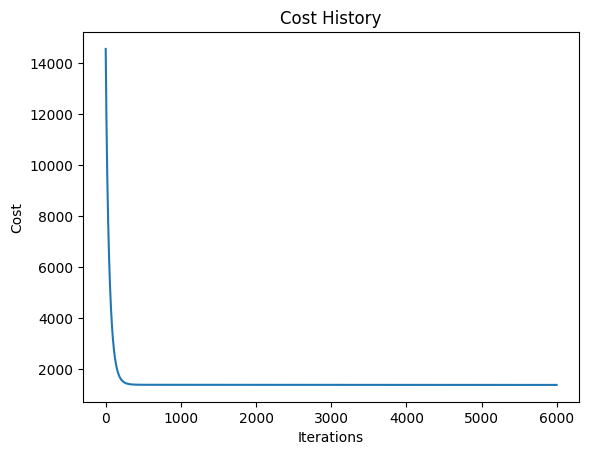

In [9]:
linear_reg = linear_regression(train_X=X_train, train_y=y_train, test_x=X_test, test_y=y_test)

# Train the model
theta, cost_history = linear_reg.train()
print(theta)
linear_reg.visulaize_costhistory(cost_history)


## <div class = "alert alert-block alert-info"> Evaluating our model on the diabetes dataset </div>
 

## <div class = "alert alert-block alert-warning"> Our evaluation shows difference on this data which has more features than the previous. </div>

### As we see below its Root mean squared Error is about 58.73 and  its coefficient of determination(R<sup> 2 </sup>) is about 0.32

### So We can conclude linear regression performs well on dataset whose features are linearly related to the target. and if relationship is non-linear, the model may not perform well.

In [11]:
predictions = linear_reg.predict(X_test, theta)
print(predictions)

linear_reg.evaluate_model(y_test, predictions)


[237.36722442 249.40466622 163.81501233 121.02573611 185.66054056
 259.55475693 113.28059369 187.88680568 153.69584361 234.63133068
 170.08161658 177.30753924 109.48861566  93.62019385 241.24907187
  90.28818587 154.19257236  67.81373356 102.81548302 216.9862556
 196.94726724 159.40355321 160.39910659 158.94686092 197.3478334
 166.9195177  116.55074645  85.12140475 188.5577495  159.19368735
 173.29388857  86.35502955 146.09628408 144.60548267 141.11517815
 195.17968618 164.81752957 186.97876435 130.2666221  205.35641184
  84.65871207 162.82754334 144.01049006 183.27777854 176.58970298
  75.59048955 139.855595   139.87967439 119.82113357 233.6974565
 160.69844921  77.25044313 156.94673374 154.86998397 236.7404607
 171.0816465  189.07639368 119.516331   132.19184631 168.99798026
 213.22866682 170.41373951 159.19243765 109.44323871 262.84152513
 151.79218477  83.61931824 228.31234206 200.16371465  42.86807502
  81.09912689 128.7577733  102.71236734 143.86966571 133.11951663
 186.68180987 